# Import and Downloads

## Install Modules

In [1]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.2 MB/s 


In [2]:
! git clone https://github.com/GuiSilvaPA/TextToImage.git

Cloning into 'TextToImage'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 259 (delta 18), reused 27 (delta 12), pack-reused 226
Receiving objects: 100% (259/259), 21.05 MiB | 25.90 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 50.4 MB/s 
     |████████████████████████████████| 6.6 MB 51.8 MB/s 
     |████████████████████████████████| 101 kB 13.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install resize_right

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install einops_exts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [7]:
import sys
sys.path.insert(0,'/content/TextToImage/Imagen')

In [8]:
import torch
from Imagen import Imagen

Downloading:   0%|          | 0.00/537 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.0.layer_norm.weight', 'decoder.block.5.layer.0.SelfAttention.k.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.1.EncDecAttention.q.weight', 'decoder.block.7.layer.1.layer_norm.weight', 'decoder.block.2.layer.0.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.2.layer_norm.weight', 'decoder.block.5.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.0.SelfAttention.v.weight', 'decoder.block.3.layer.1.EncDecAttention.k.weight', 'decoder.block.5.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.rel

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

In [9]:
from OldComplexModels import UNet
from ImagenTools import CustomDataset, ImagenTrainer

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.0.layer_norm.weight', 'decoder.block.5.layer.0.SelfAttention.k.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.1.EncDecAttention.q.weight', 'decoder.block.7.layer.1.layer_norm.weight', 'decoder.block.2.layer.0.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.2.layer_norm.weight', 'decoder.block.5.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.0.SelfAttention.v.weight', 'decoder.block.3.layer.1.EncDecAttention.k.weight', 'decoder.block.5.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.rel

In [10]:
from torch.utils.data import Dataset, DataLoader
import json
import h5py
import numpy as np
from torchvision import transforms
import random

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch.nn as nn

from torch.optim import Adam
from pathlib import Path

import cv2

import torchvision.transforms as T

In [11]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Download COCO Dataset

In [12]:
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_IMAGES_coco_5_cap_per_img.hdf5

--2022-07-20 20:03:17--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289777 (283K) [application/json]
Saving to: ‘TEST_CAPTIONS_coco_5_cap_per_img.json’

TEST_CAPTIONS_coco_ 100%[===================>] 282.99K  --.-KB/s    in 0.002s  

2022-07-20 20:03:17 (143 MB/s) - ‘TEST_CAPTIONS_coco_5_cap_per_img.json’ saved [289777/289777]

--2022-07-20 20:03:17--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request 

# Dataset and Model

In [13]:
from PIL import Image
from ImagenTools import CustomDataset, collate_any

In [14]:
train_set = CustomDataset("./TRAIN_IMAGES_coco_5_cap_per_img.hdf5", "./TRAIN_CAPTIONS_coco_5_cap_per_img.json", image_size=64)
val_set   = CustomDataset("./VAL_IMAGES_coco_5_cap_per_img.hdf5",   "./VAL_CAPTIONS_coco_5_cap_per_img.json",   image_size=64)
test_set  = CustomDataset("./TEST_IMAGES_coco_5_cap_per_img.hdf5",  "./TEST_CAPTIONS_coco_5_cap_per_img.json",  image_size=64)

## Dataset Tester

In [15]:
train_loader = DataLoader(train_set, batch_size=10, collate_fn=collate_any)

In [16]:
imgs, texts = next(iter(train_loader))

print(type(imgs), type(texts))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [22]:
texts

array(['A woman in a room with a cat.',
       'Men are crowded on the back of a small overloaded pickup truck.',
       'A boat is being rolled on a trailer',
       'three bicycle riders some trees and a pigeon',
       'A toilet is sitting on the ground next to a plant.',
       'A donut on the antenna of a car.',
       "An orange striped tabby cat laying on top of a red vehicle's wheel.",
       'An airplane flies over a street with many cars.',
       'a person standing in a stone walled and floored room wearing a backpack ',
       'People walking pass a horse drawn carriage sitting at the curb'],
      dtype='<U72')

In [23]:
imgs.shape

torch.Size([10, 3, 64, 64])

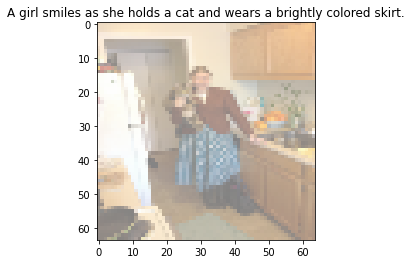

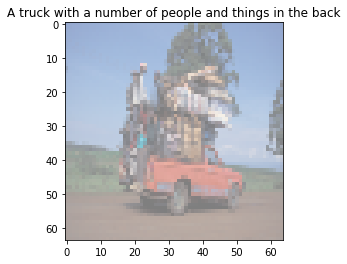

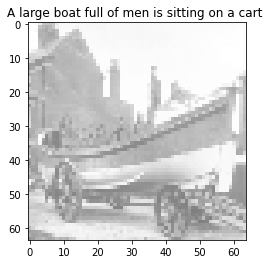

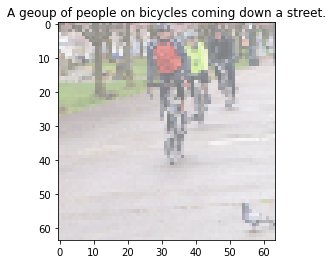

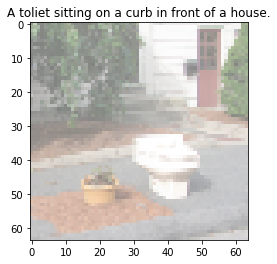

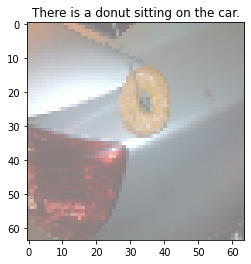

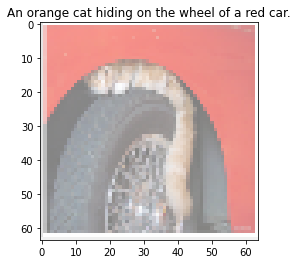

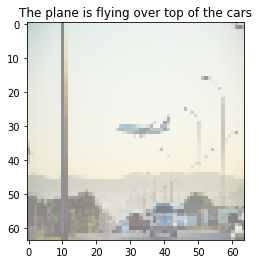

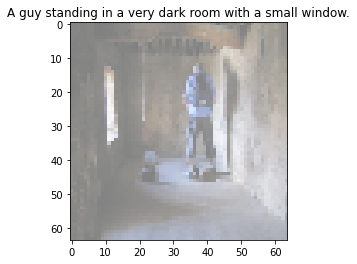

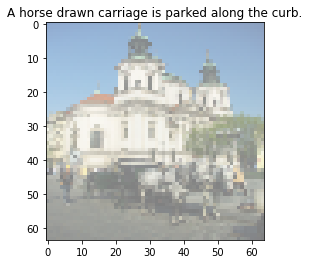

In [24]:
imgs, texts = next(iter(train_loader))
for img, text in zip(imgs, texts):
    # Para apresentar as imagens é necessario desfazer a normalização empregada nas imagens
    plt.imshow((img.numpy().transpose(1, 2, 0)+1)/2) # adversarial
    plt.title(text)
    plt.show()

# Model Initialization

In [25]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [26]:
unet1 = UNet(dim = 32, cond_dim = 512, text_embed_dim = 512,  # 32
             dim_mults = (1, 2, 4, 8), num_resnet_blocks = 3, # (1, 2, 4, 8) - 3
             layer_attns = (False, True, True, True),
             layer_cross_attns = (False, True, True, True), device=device).to(device)

imgen_model = Imagen((unet1,), image_sizes=(64,), timesteps=1000,
                      text_encoder_name = 'google/t5-v1_1-small', cond_drop_prob = 0.3, device=device).to(device) # 0.1

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.0.layer_norm.weight', 'decoder.block.5.layer.0.SelfAttention.k.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.1.layer.1.EncDecAttention.q.weight', 'decoder.block.7.layer.1.layer_norm.weight', 'decoder.block.2.layer.0.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.2.layer_norm.weight', 'decoder.block.5.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.0.SelfAttention.v.weight', 'decoder.block.3.layer.1.EncDecAttention.k.weight', 'decoder.block.5.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.SelfAttention.rel

In [27]:
batch_size  = 5
num_workers = 2

train_loader = DataLoader(train_set, shuffle=False, batch_size=batch_size, num_workers=num_workers, collate_fn=collate_any)

# Model Overfitting

## Class

In [28]:
class ImagenTrainer(nn.Module):

    def __init__(self, imagen, high_model = None, epochs = 10, first_epoch=1, p=1, lr = 1e-4, eps = 1e-8,
                 beta1 = 0.9, beta2 = 0.99, device='cpu'):

        super(ImagenTrainer, self).__init__()

        self.p           = p
        self.imagen      = imagen
        self.unet        = imagen.unets[0]
        self.device      = device
        self.first_epoch = first_epoch
        self.optimizer   = Adam(self.unet.parameters(), lr=lr, eps=eps, betas=(beta1, beta2))
        self.epochs      = epochs
        self.high_model  = high_model

    @torch.no_grad()
    def sample(self, texts, cond_scale, use_high_resolution = False):
        
        output = self.imagen.sample(texts=texts, cond_scale=cond_scale)

        if use_high_resolution:
            output = self.high_model(output)

        return output

    def forward(self, train_data):

        train_loss_per_epoch = []

        images, texts = next(iter(train_data))

        self.texts  = texts
        self.images = images

        print(texts)

        for epoch in tqdm(range(self.first_epoch, self.epochs+1)):

            images = images.float().to(self.device)

            self.optimizer.zero_grad()

            loss = self.imagen(images, texts=texts, device=self.device)
            loss.backward()
            self.optimizer.step()

            total_train_loss = loss.item()/10
            train_loss_per_epoch.append(total_train_loss)

            if epoch % 250 == 0:

                print(f'Epoch: {epoch:4d} | Train Loss: {total_train_loss:.7f}')

        return train_loss_per_epoch

## Train

In [29]:
trainer = ImagenTrainer(imgen_model, epochs = 10000, first_epoch=1, p=1, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [30]:
train_loss_per_epoch = trainer(train_loader)

['A girl smiles as she holds a cat and wears a brightly colored skirt.'
 'Men are crowded on the back of a small overloaded pickup truck.'
 'A bunch of people aboard a boat with wheels. '
 'People riding bicycles down the road approaching a bird.'
 'A toilet is sitting on the ground next to a plant.']


  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch:  250 | Train Loss: 0.0077332
Epoch:  500 | Train Loss: 0.0132897
Epoch:  750 | Train Loss: 0.0081075
Epoch: 1000 | Train Loss: 0.0143131
Epoch: 1250 | Train Loss: 0.0023622
Epoch: 1500 | Train Loss: 0.0017551
Epoch: 1750 | Train Loss: 0.0030393
Epoch: 2000 | Train Loss: 0.0008013
Epoch: 2250 | Train Loss: 0.0009189
Epoch: 2500 | Train Loss: 0.0012695
Epoch: 2750 | Train Loss: 0.0005594
Epoch: 3000 | Train Loss: 0.0005981
Epoch: 3250 | Train Loss: 0.0007384
Epoch: 3500 | Train Loss: 0.0014162
Epoch: 3750 | Train Loss: 0.0009908
Epoch: 4000 | Train Loss: 0.0010056
Epoch: 4250 | Train Loss: 0.0054104
Epoch: 4500 | Train Loss: 0.0003413
Epoch: 4750 | Train Loss: 0.0004958
Epoch: 5000 | Train Loss: 0.0006116
Epoch: 5250 | Train Loss: 0.0003096
Epoch: 5500 | Train Loss: 0.0045332
Epoch: 5750 | Train Loss: 0.0009249
Epoch: 6000 | Train Loss: 0.0002644
Epoch: 6250 | Train Loss: 0.0010267
Epoch: 6500 | Train Loss: 0.0004875
Epoch: 6750 | Train Loss: 0.0013667
Epoch: 7000 | Train Loss: 0.

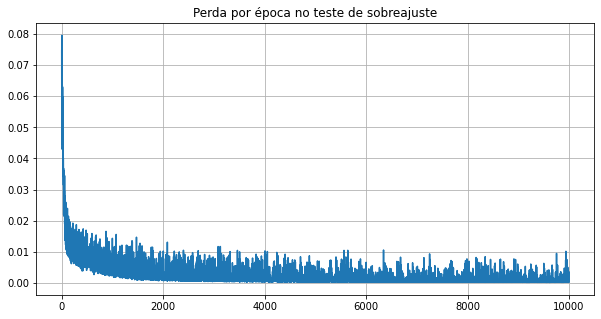

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_per_epoch)
plt.title("Perda por época no teste de sobreajuste")
plt.grid(True)
plt.show()

In [37]:
imgs_out = trainer.sample(trainer.texts, cond_scale=3.)

Obtendo a imagem ...:   0%|          | 0/1000 [00:00<?, ?it/s]

In [38]:
trainer.texts

array(['A girl smiles as she holds a cat and wears a brightly colored skirt.',
       'Men are crowded on the back of a small overloaded pickup truck.',
       'A bunch of people aboard a boat with wheels. ',
       'People riding bicycles down the road approaching a bird.',
       'A toilet is sitting on the ground next to a plant.'], dtype='<U68')

In [30]:
trainer.images.shape

torch.Size([10, 3, 128, 128])

In [ ]:
img = imgs_out

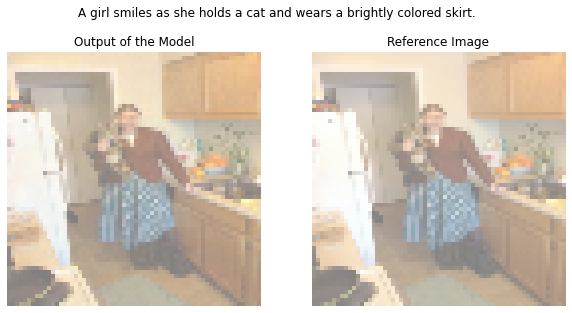

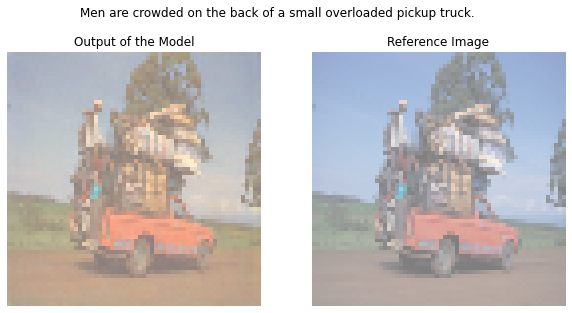

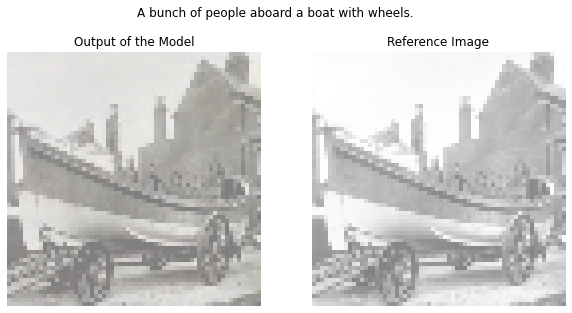

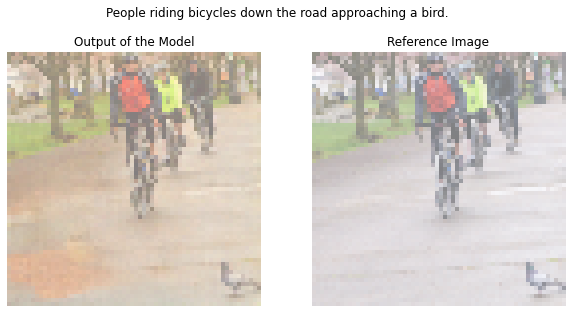

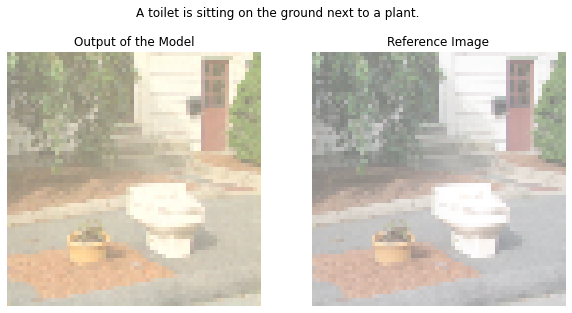

In [39]:
for img, im, text in zip(imgs_out.cpu(), trainer.images.cpu(), trainer.texts):
    # Para apresentar as imagens é necessario desfazer a normalização empregada nas imagens
    fig = plt.figure(figsize=(10, 5))

    fig.add_subplot(1, 2, 1)
    plt.imshow((img.numpy().transpose(1, 2, 0)+1)/2) # adversarial
    plt.title('Output of the Model')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.imshow((im.numpy().transpose(1, 2, 0)+1)/2) # adversarial
    plt.title('Reference Image')
    plt.axis('off')

    fig.suptitle(text)

    plt.show()

    print('\n=========================================================================== \n')

# FID Score

In [40]:
from ImagenTools import get_images, FID

In [41]:
fid = FID(trainer.images.float(), trainer.images.float())
print(f'FID Equals= {fid:.4f}')

87924736/87910968 [==============================] - 0s 0us/step
FID Equals= -0.0003


In [42]:
fid = FID(imgs_out.float(), trainer.images.float())
print(f'FID Equals= {fid:.4f}')

FID Equals= 73.9235
